In [48]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score
np.set_printoptions(suppress=True)

In [7]:
#function to load the data and randomise it and normalise it further
def loadData():
    df = pd.read_csv('diabetes2.csv', index_col=False)
    df = df.sample(frac=1).reset_index(drop=True)   #shuffling the data
    data=np.array(df,dtype=float)
        
#     print(df)
#     print(data)
#     normalise(data)
    x=data[:,:8]
    y=data[:,-1]
#     print(x)
#     print(y)
    return x,y
    

In [8]:
def train_val_test_split(x,y):
    trainX=[]
    testX=[]
    trainY=[]
    testY=[]
    valX=[]
    valY=[]
    #we have train:val:test = 7:2:1
    trainFreq=int((7/10)*x.shape[0])
    valFreq=int((2/10)*x.shape[0])
    for i in range(trainFreq):
        trainX.append(x[i])
        trainY.append(y[i])
    for i in range(trainFreq,trainFreq+valFreq):
        valX.append(x[i])
        valY.append(y[i])
    for i in range(trainFreq+valFreq,x.shape[0]):
        testX.append(x[i])
        testY.append(y[i])
    
    return np.array(trainX),np.array(trainY),np.array(valX),np.array(valY),np.array(testX),np.array(testY)
    

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
def cost(x,y,theta):
    m=x.shape[0]
    return (-1*((y.T@np.log(sigmoid(x@theta))) + (1-y).T @ np.log(1 - sigmoid(x@theta)))/m)

In [11]:
#performing gradient decent to find the minimal cost
def gradientDecent(x,y,theta,learningRate,epoch,valX,valY,typeGD):
    
    m=x.shape[0]  #number of entries in data
    allJ=[]
    allJVal=[]
    if(typeGD=='bgd'):
        for i in range(epoch):
            tempCost=(x.T@(sigmoid(x@theta)-y))/m
    #         print("tempcost",tempCost.shape)
            theta-=(learningRate)*tempCost
            allJ.append(cost(x,y,theta)[0][0])
            allJVal.append(cost(valX,valY,theta)[0][0])

        return theta, allJ, allJVal
    else:
        for i in range(epoch):
            point=random.randint(x.shape[0])
        return 0
            
            

In [55]:
def logisticRegression(learningRate,trainingX,trainingY,validatingX,validatingY):
    
    theta=np.zeros((trainingX.shape[1],1))
    theta, allJ, allJVal = gradientDecent(trainingX,trainingY,theta,learningRate,100000,validatingX,validatingY,'bgd') #we have a learning rate of 0.1 and 100000 epoch

    J=cost(trainingX,trainingY,theta)
    JVal=cost(validatingX,validatingY,theta)
    print("The data below is for a learning rate = ",learningRate)
    print("cost training: ",J[0][0])
    print("parameters: ", theta)
    print("cost validating",JVal[0][0])
    
    allJ=np.array(allJ)
    allJVal=np.array(allJVal)
    # print(allJ)
    plt.plot(allJ)
    plt.title("loss vs epoch for training set")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    plt.plot(allJVal)
    plt.title("loss vs epoch for validating set")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    print("-----------------------------------\n\n")
    return theta


(768, 8)
(768, 1)
(153, 9)
The data below is for a learning rate =  0.0001
cost training:  0.5917155555901056
parameters:  [[-0.39823252]
 [ 0.11511837]
 [ 0.01372316]
 [-0.03071224]
 [ 0.00538453]
 [ 0.00045255]
 [ 0.00150837]
 [ 0.08557941]
 [-0.01035048]]
cost validating 0.5994257143502973


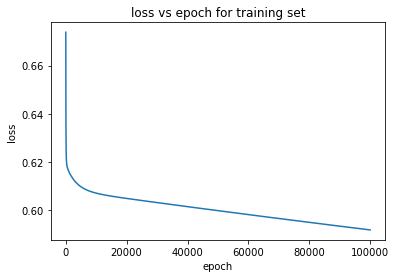

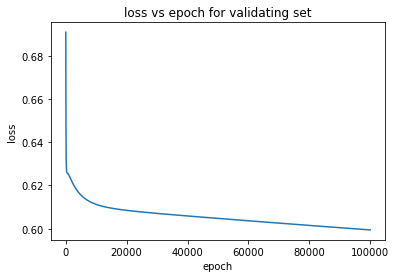

-----------------------------------




In [56]:
#performing logistic regression by invoking all the functions
x,y = loadData()
# print(x.shape)
# print(y.shape)
y=np.reshape(y,(-1,1))
print(x.shape)
print(y.shape)
x = np.hstack((np.ones((x.shape[0],1)),x)) #adding a column of 1s for matrix multiplication
trainingX,trainingY,validatingX,validatingY,testingX,testingY = train_val_test_split(x,y)
print(validatingX.shape)

thetaImp=logisticRegression(0.0001,trainingX,trainingY,validatingX,validatingY)


c:\users\utkarsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\utkarsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in matmul
  This is separate from the ipykernel package so we can avoid doing imports until


The data below is for a learning rate =  0.01
cost training:  nan
parameters:  [[-35.98312896]
 [  3.47415018]
 [  0.58363183]
 [ -0.79120899]
 [  0.09283451]
 [  0.07926769]
 [  0.00090858]
 [  6.24386226]
 [ -0.15324181]]
cost validating nan


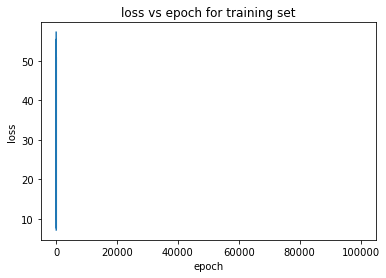

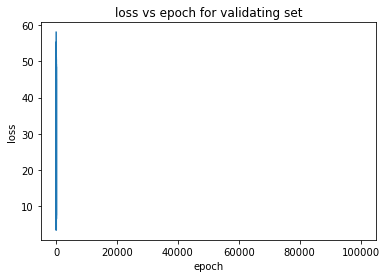

-----------------------------------




In [14]:
testThetalogisticRegression(0.01,trainingX,trainingY,validatingX,validatingY)

The data below is for a learning rate =  0.0001
cost training:  0.6216236953700602
parameters:  [[-0.00390698]
 [ 0.01466318]
 [ 0.01191918]
 [-0.02734621]
 [ 0.00330402]
 [ 0.00095815]
 [-0.0052755 ]
 [ 0.00050504]
 [-0.0017053 ]]
cost validating 0.6327922018969919


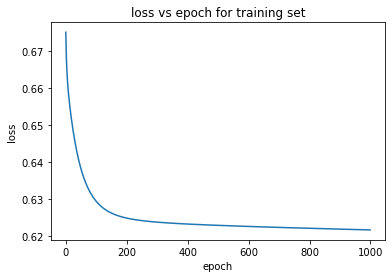

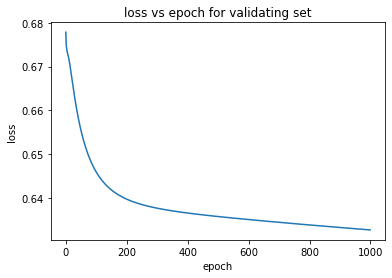

-----------------------------------




In [34]:
testTheta1=logisticRegression(0.0001,trainingX,trainingY,validatingX,validatingY)

c:\users\utkarsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
c:\users\utkarsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\utkarsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in matmul
  This is separate from the ipykernel package so we can avoid doing imports until


The data below is for a learning rate =  10
cost training:  nan
parameters:  [[-35888.91654995]
 [  3421.87458678]
 [   113.29171724]
 [ -1029.28877108]
 [    17.97414911]
 [  -273.54454482]
 [  -121.80232639]
 [  6281.12832293]
 [  -277.65509737]]
cost validating nan


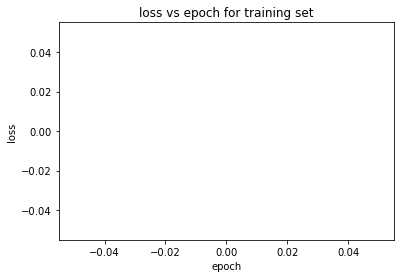

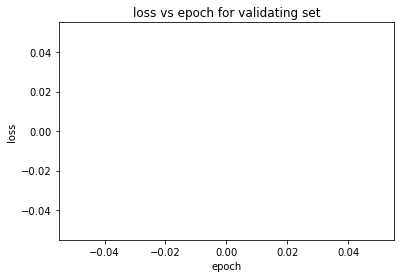

-----------------------------------




In [16]:
testTheta2=logisticRegression(10,trainingX,trainingY,validatingX,validatingY)

In [17]:
def test(theta, x):
    if(sigmoid(x@theta)>=0.5):
        return 1
    else:
        return 0

In [57]:
testSize = testingX.shape[0]
TP=0
FP=0
TN=0
FN=0

for i in range(testSize):
    outcome = test(thetaImp,testingX[i])
    if(outcome==1 and outcome==testingY[i]):
        TP+=1
    elif(outcome==1 and outcome!=testingY[i]):
        FP+=1
    elif(outcome==0 and outcome==testingY[i]):
        TN+=1
    else:
        FN+=1

print(TP,FP,TN,FN)


    




8 6 49 15


In [61]:
confusion=[[TP,FP],[TN,FN]]
confusionMatrix=np.array(confusion)
print("Confusion matrix we get is ")
print(confusionMatrix)


recall = TP/(TP+FN)
precision = TP/(TP+FP)
accuracy = (TP+TN)/testSize
fMeasure = (2*recall*precision)/(recall+precision)

print("Recall = ",recall)
print("Precision = ",precision)
print("accuracy = ",accuracy)
print("f1Measure = ",fMeasure)

Confusion matrix we get is 
[[ 8  6]
 [49 15]]
Recall =  0.34782608695652173
Precision =  0.5714285714285714
accuracy =  0.7307692307692307
f1Measure =  0.4324324324324324


In [66]:
regression = LogisticRegression(max_iter=1000)
regression.fit(trainingX,trainingY)
yPred=regression.predict(testingX)
print(confusion_matrix(testingY, yPred))

[[50  5]
 [12 11]]


c:\users\utkarsh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [67]:
print("Accuracy using sklearn :",accuracy_score(testingY,yPred))
print("Precision using sklearn:",precision_score(testingY, yPred))
print("Recall using sklearn:",recall_score(testingY, yPred))
print("f1 score using sklearn:",f1_score(testingY, yPred))

Accuracy using sklearn : 0.782051282051282
Precision using sklearn: 0.6875
Recall using sklearn: 0.4782608695652174
f1 score using sklearn: 0.5641025641025642
